<a href="https://colab.research.google.com/github/Anshuldogra001/Grip_Internship/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name- Abhinav Dogra
#Task 5- To Explore Data Analytics- Sports
#Grip@ The Spark foundation network
* To perform ‘Exploratory Data Analysis’ on dataset ‘deliveries.csv’ and 'matches.csv'.

* As a sport analyst finding out most succesful Team, player and factors contributing win or loss of a team.

* Suggest team or players a company should endorse for its products.

* We are going to use python 

In [ ]:
# Import all necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
m_data = pd.read_csv("matches.csv")
m_data.drop(["id"],axis=1,inplace=True)

In [ ]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          754 non-null    object
 15  umpire2          754 non-null    object
 16  umpire3          119 non-null    object
dtypes: int64(4), object(13)
memory usag

In [ ]:
m_data.duplicated().sum()

0

In [ ]:
m_data.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


In [ ]:
m_data.cov()

,season,dl_applied,win_by_runs,win_by_wickets
season,11.335982,-0.000589,-2.965710,-0.106990
dl_applied,-0.000589,0.024533,-0.060104,-0.006172
win_by_runs,-2.965710,-0.060104,550.894600,-44.564256
win_by_wickets,-0.106990,-0.006172,-44.564256,11.478291


In [ ]:
m_data.corr()

,season,dl_applied,win_by_runs,win_by_wickets
season,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.009379,-0.011631,-0.560420,1.000000


In [ ]:
m_data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [ ]:
m_data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


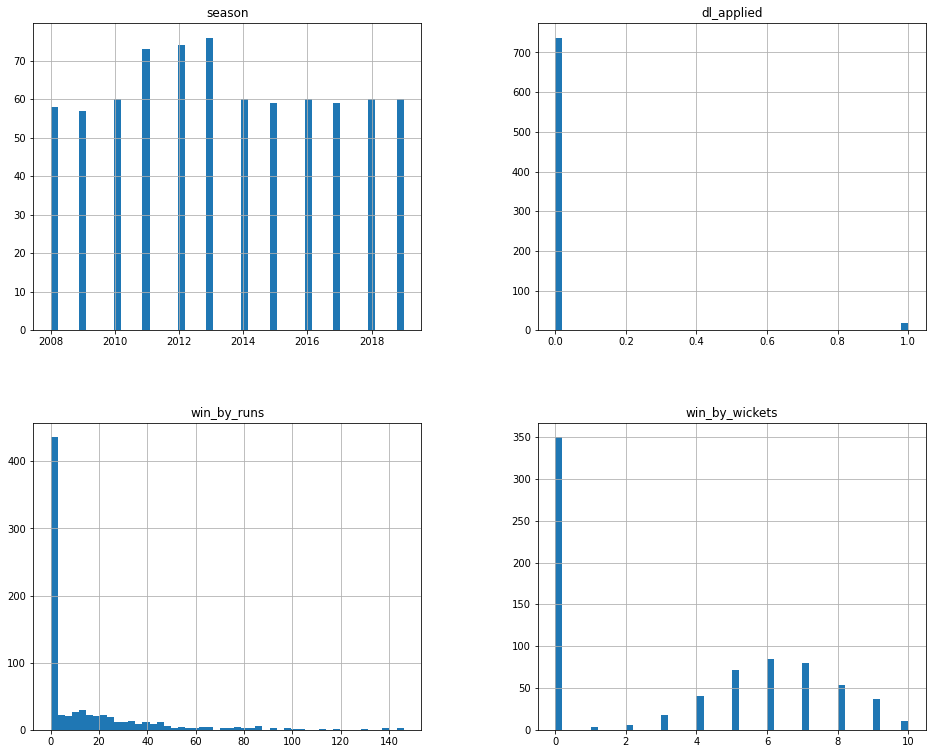

In [ ]:
m_data.hist(bins=50 ,figsize=(16,13))
plt.show();

In [ ]:
d_data = pd.read_csv("deliveries.csv")
d_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
d_data.duplicated().sum()

23

In [ ]:
d_data.drop_duplicates()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
d_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
d_data.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.003958,0.008268,-0.001349,-0.009150,-0.007549,0.000905,-0.012429,-0.004623,-0.001475,0.033510,-0.013323,0.030727
inning,0.003958,1.000000,-0.050076,-0.003943,0.084154,0.001201,-0.000757,-0.001996,-0.000904,0.003442,-0.005362,-0.000531,-0.005485
over,0.008268,-0.050076,1.000000,-0.007424,-0.034329,-0.010003,0.012111,-0.004764,0.016984,-0.000979,0.086701,-0.002479,0.086326
ball,-0.001349,-0.003943,-0.007424,1.000000,-0.001143,-0.004665,0.006602,-0.002727,0.000567,0.000711,0.007950,-0.002576,0.007414
is_super_over,-0.009150,0.084154,-0.034329,-0.001143,1.000000,-0.001019,0.001353,0.001735,0.013640,-0.000071,0.010125,0.003504,0.010891
wide_runs,-0.007549,0.001201,-0.010003,-0.004665,-0.001019,1.000000,-0.006196,-0.015855,-0.008675,0.012817,-0.094579,0.720916,0.059077
bye_runs,0.000905,-0.000757,0.012111,0.006602,0.001353,-0.006196,1.000000,-0.004596,-0.002515,-0.000142,-0.018936,0.332352,0.051946
legbye_runs,-0.012429,-0.001996,-0.004764,-0.002727,0.001735,-0.015855,-0.004596,1.000000,-0.006434,-0.000362,-0.070106,0.554458,0.048075
noball_runs,-0.004623,-0.000904,0.016984,0.000567,0.013640,-0.008675,-0.002515,-0.006434,1.000000,-0.000198,0.004832,0.194899,0.046427
penalty_runs,-0.001475,0.003442,-0.000979,0.000711,-0.000071,0.012817,-0.000142,-0.000362,-0.000198,1.000000,-0.002591,0.057882,0.009755


In [ ]:
d_data.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.205703e+07,6.900232,162.999182,-8.466243,-6.755780e-01,-6.583802,3.661017e-01,-8.411842,-1.131533e+00,-8.559184e-02,187.136446,-15.846666,171.289779
inning,6.900232e+00,0.252078,-0.142748,-0.003577,8.983897e-04,0.000151,-4.427806e-05,-0.000195,-3.200143e-05,2.887297e-05,-0.004330,-0.000091,-0.004421
over,1.629992e+02,-0.142748,32.236099,-0.076165,-4.144371e-03,-0.014265,8.009743e-03,-0.005272,6.797616e-03,-9.283648e-05,0.791686,-0.004822,0.786864
ball,-8.466243e+00,-0.003577,-0.076165,3.265126,-4.390573e-05,-0.002117,1.389467e-03,-0.000960,7.217961e-05,2.146638e-05,0.023103,-0.001594,0.021508
is_super_over,-6.755780e-01,0.000898,-0.004144,-0.000044,4.521148e-04,-0.000005,3.351362e-06,0.000007,2.044492e-05,-2.525823e-08,0.000346,0.000026,0.000372
wide_runs,-6.583802e+00,0.000151,-0.014265,-0.002117,-5.441434e-06,0.063082,-1.812725e-04,-0.000776,-1.535895e-04,5.379131e-05,-0.038204,0.062025,0.023821
bye_runs,3.661017e-01,-0.000044,0.008010,0.001389,3.351362e-06,-0.000181,1.356755e-02,-0.000104,-2.064677e-05,-2.756578e-07,-0.003547,0.013261,0.009714
legbye_runs,-8.411842e+00,-0.000195,-0.005272,-0.000960,7.192329e-06,-0.000776,-1.043365e-04,0.037989,-8.840273e-05,-1.180277e-06,-0.021976,0.037019,0.015043
noball_runs,-1.131533e+00,-0.000032,0.006798,0.000072,2.044492e-05,-0.000154,-2.064677e-05,-0.000088,4.969188e-03,-2.335607e-07,0.000548,0.004706,0.005254
penalty_runs,-8.559184e-02,0.000029,-0.000093,0.000021,-2.525823e-08,0.000054,-2.756578e-07,-0.000001,-2.335607e-07,2.792064e-04,-0.000070,0.000331,0.000262


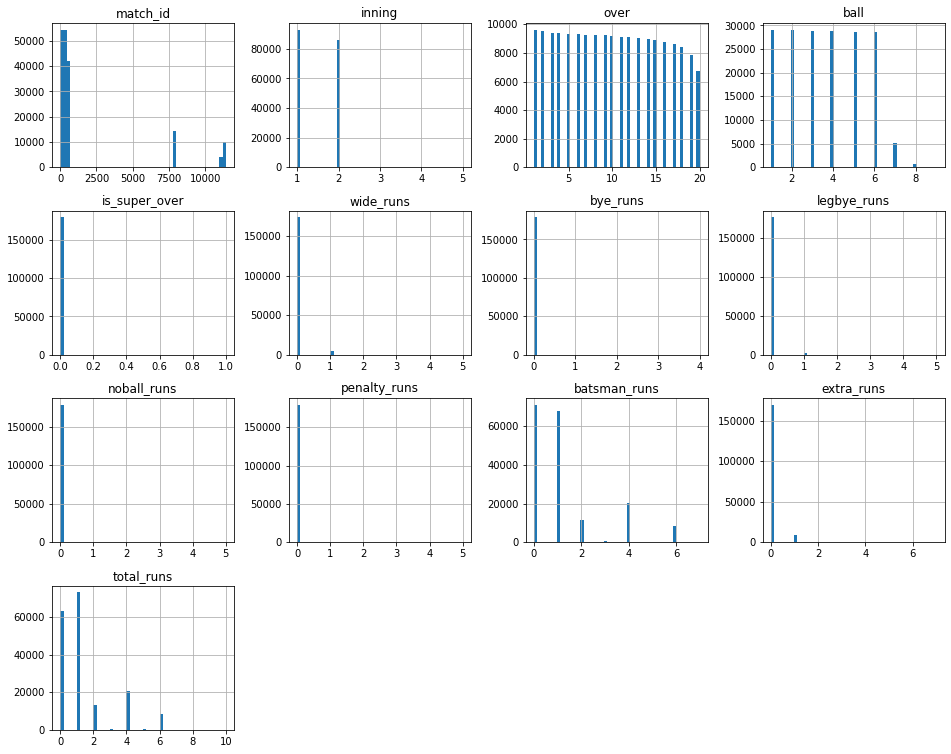

In [ ]:
d_data.hist(bins=50 ,figsize=(16,13))
plt.show();

#Let's start the visualization of the data....

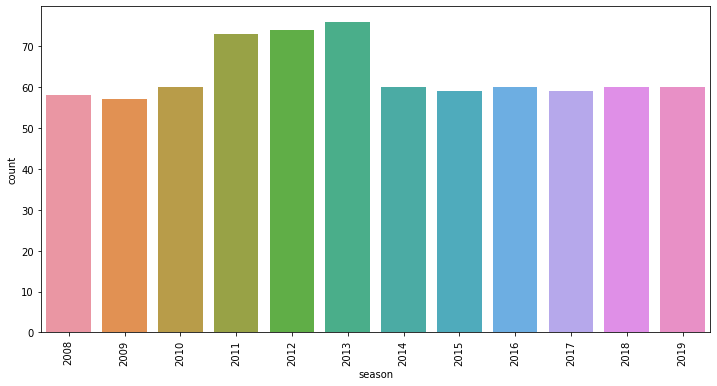

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=m_data)
plt.xticks(rotation='vertical')
plt.show()

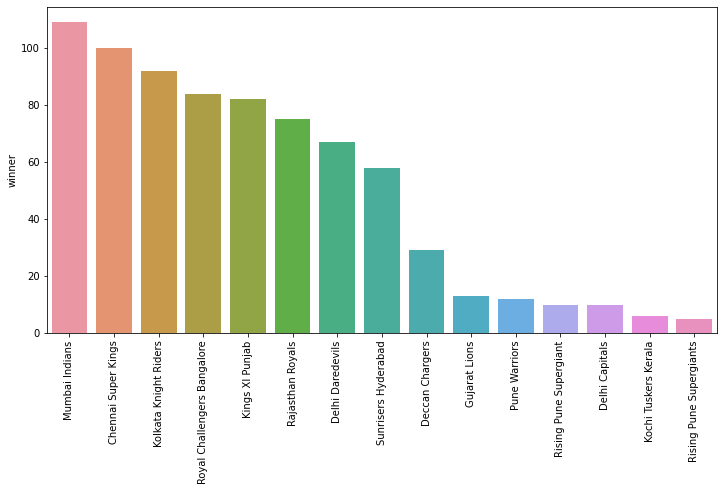

In [ ]:
plt.figure(figsize=(12,6))
data = m_data.winner.value_counts()
sns.barplot(x = data.index, y = data, orient='v')
plt.xticks(rotation='vertical')
plt.show()

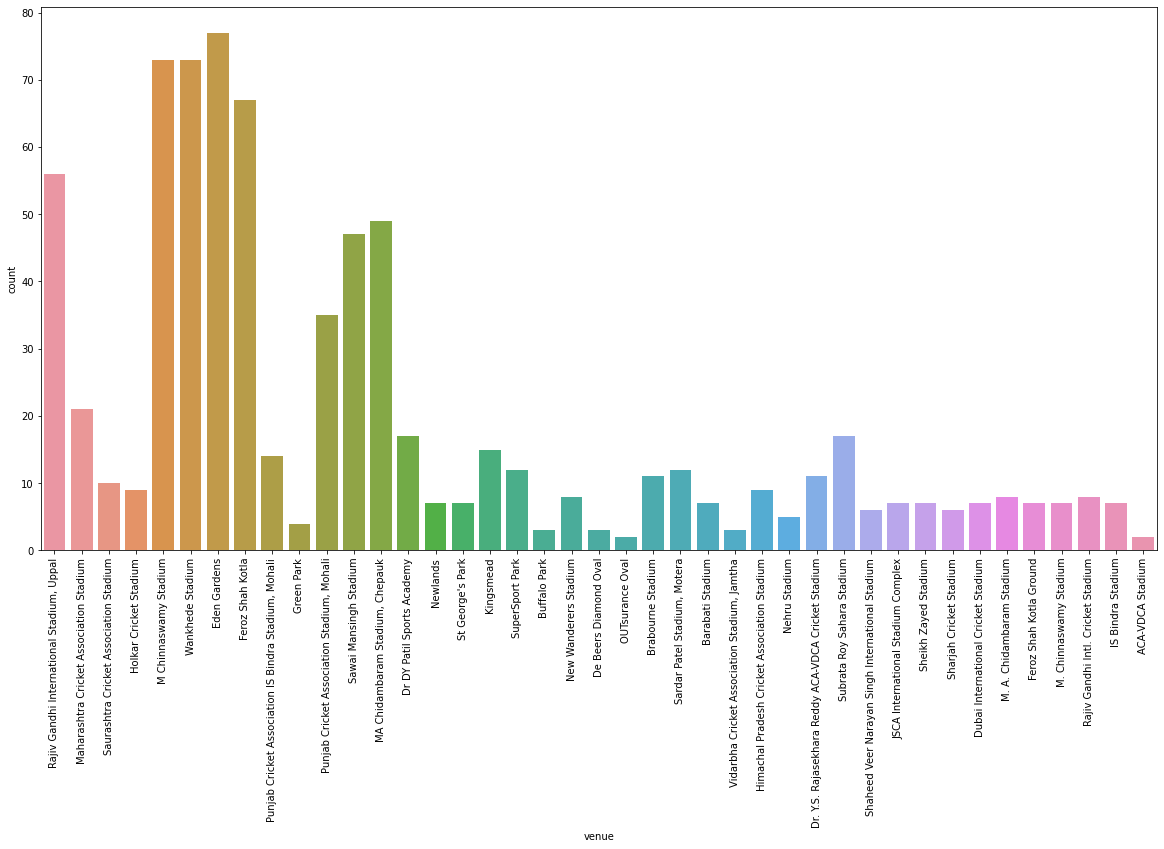

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='venue', data=m_data)
plt.xticks(rotation='vertical')
plt.show()

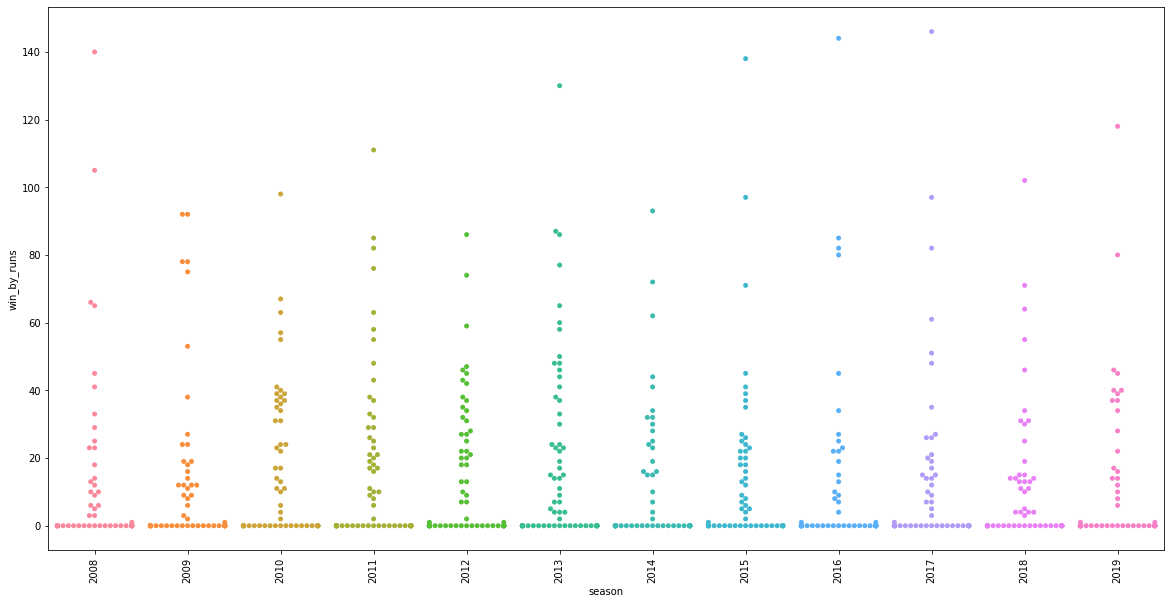

In [ ]:
plt.figure(figsize=(20,10))
sns.swarmplot(y='win_by_runs', x='season', data=m_data)
plt.xticks(rotation=90)
plt.show()

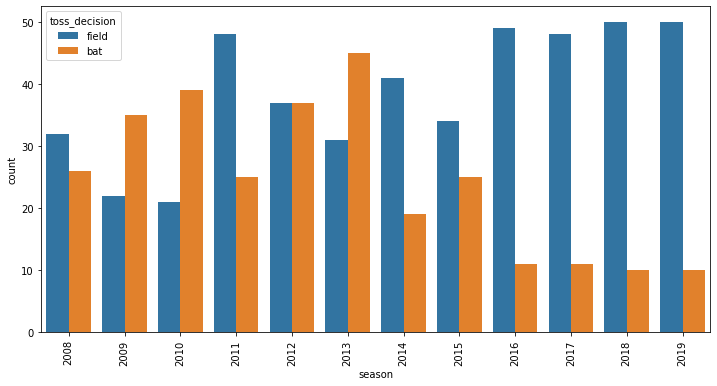

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=m_data)
plt.xticks(rotation='vertical')
plt.show()

# There is a very strong trend towards bowling first let us see the win percentage of teams bowling first.

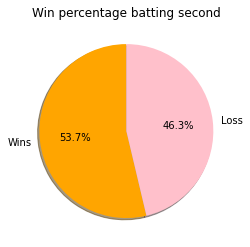

In [ ]:


num_of_wins = (m_data.win_by_wickets>0).sum()
num_of_loss = (m_data.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['orange', 'pink']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

## Let's see the performance of batsman in the IPL and find out who were the best performers in IPL

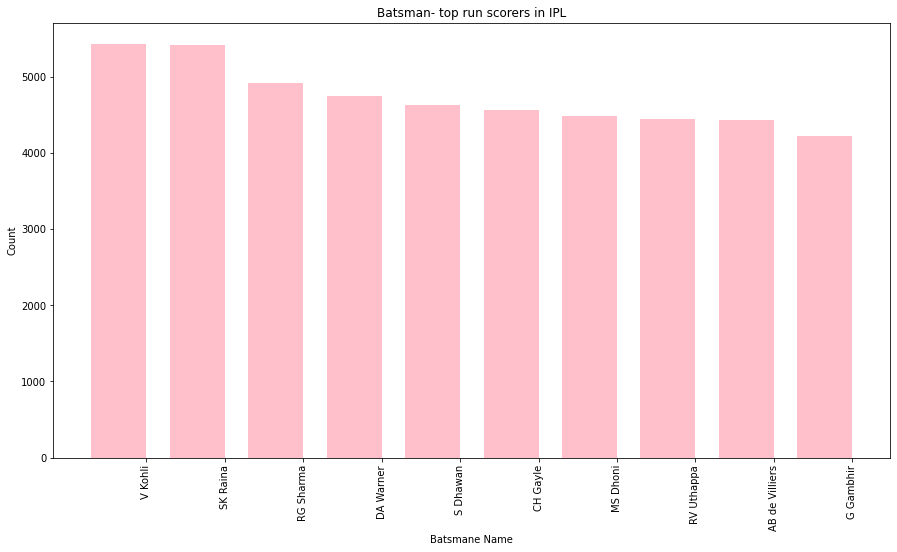

In [ ]:
temp_df = d_data.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='pink')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman- top run scorers in IPL")
ax.set_xlabel('Batsmane Name')

plt.show()

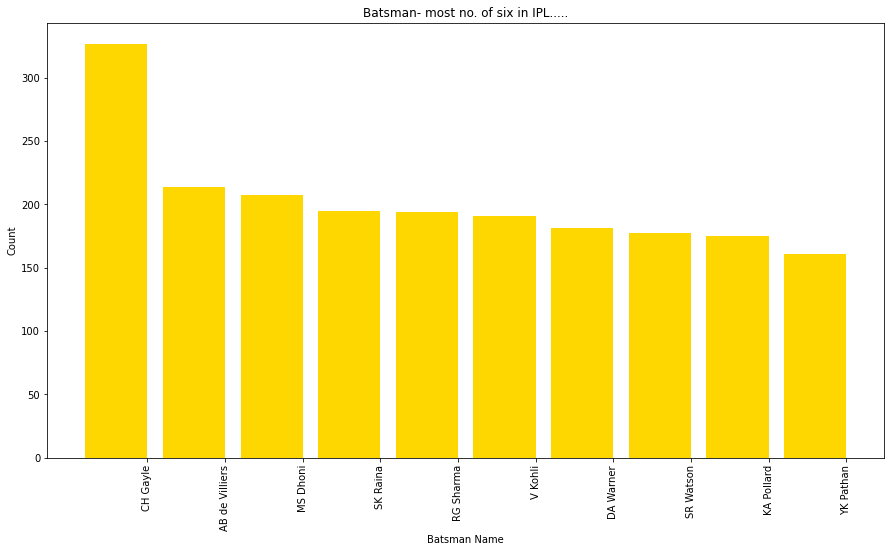

In [ ]:
# Now let us check the number of 6's
temp_df = d_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='gold')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman- most no. of six in IPL.....")
ax.set_xlabel('Batsman Name')

plt.show()

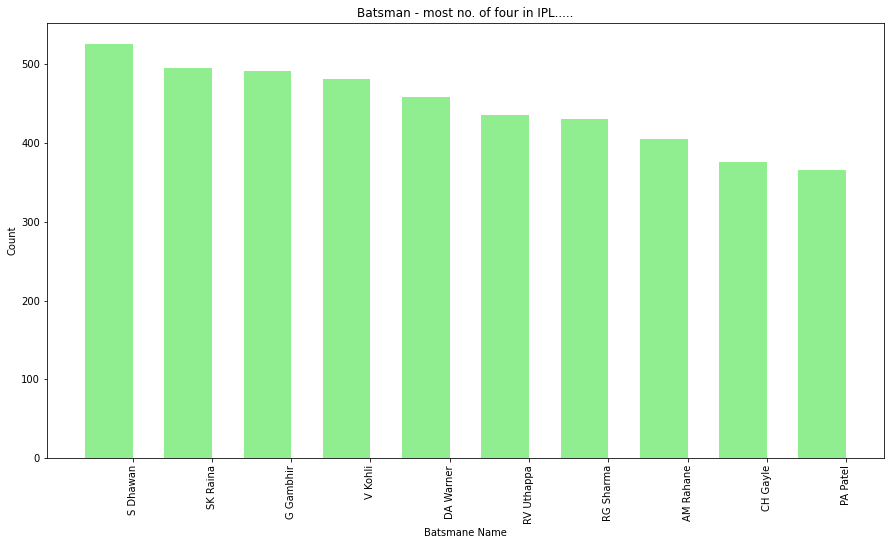

In [ ]:
# Now let us check the number of 4's
temp_df = d_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.6
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='lightgreen')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman - most no. of four in IPL.....")
ax.set_xlabel('Batsmane Name')

plt.show()

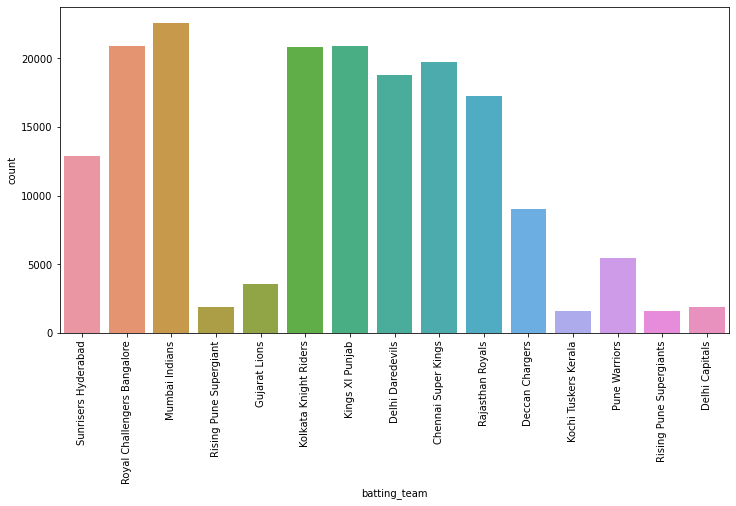

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='batting_team', data=d_data)
plt.xticks(rotation='vertical')
plt.show()

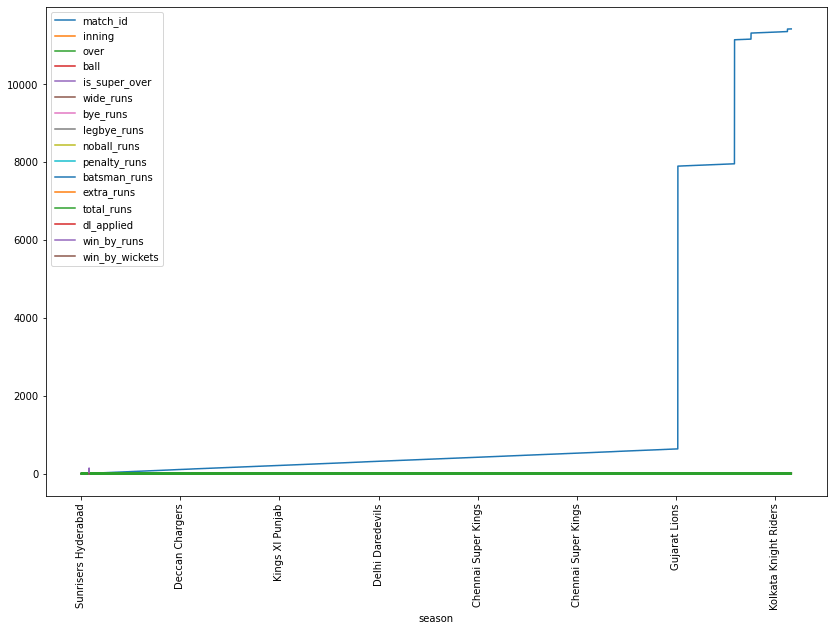

In [ ]:
firstPlot = d_data.plot(x='batting_team')
m_data.plot(x='season', ax=firstPlot,figsize=(14,9))
plt.xticks(rotation=90)
plt.show()

# Let's see the performance of bowler in the IPL and find out who were the best performers in IPL

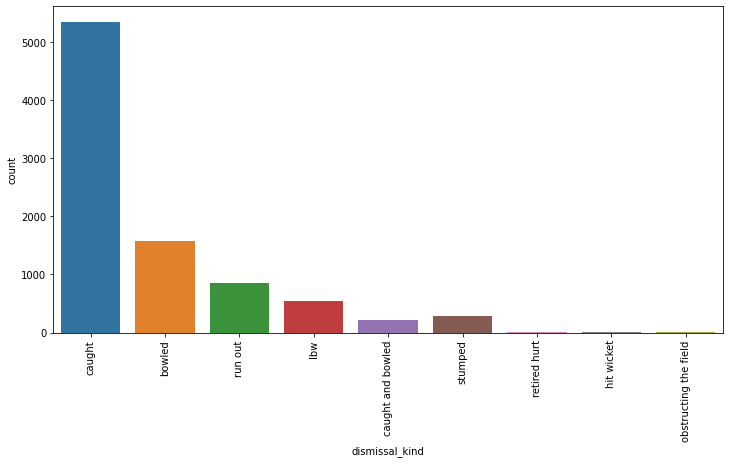

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=d_data)
plt.xticks(rotation='vertical')
plt.show()

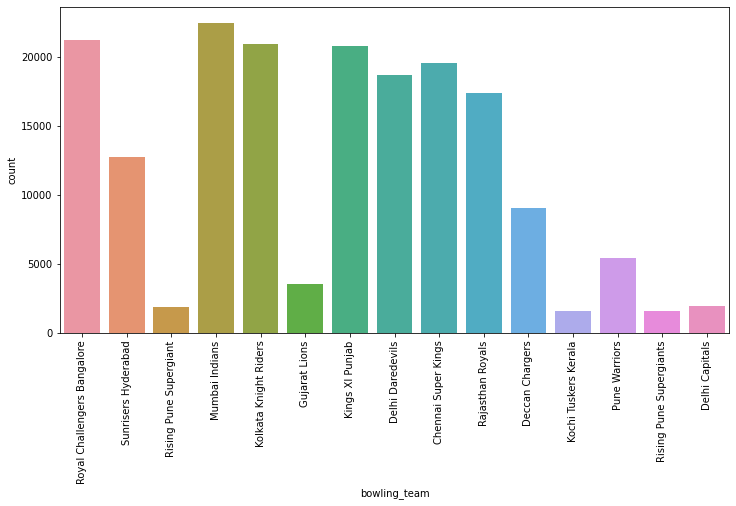

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='bowling_team', data=d_data)
plt.xticks(rotation='vertical')
plt.show()

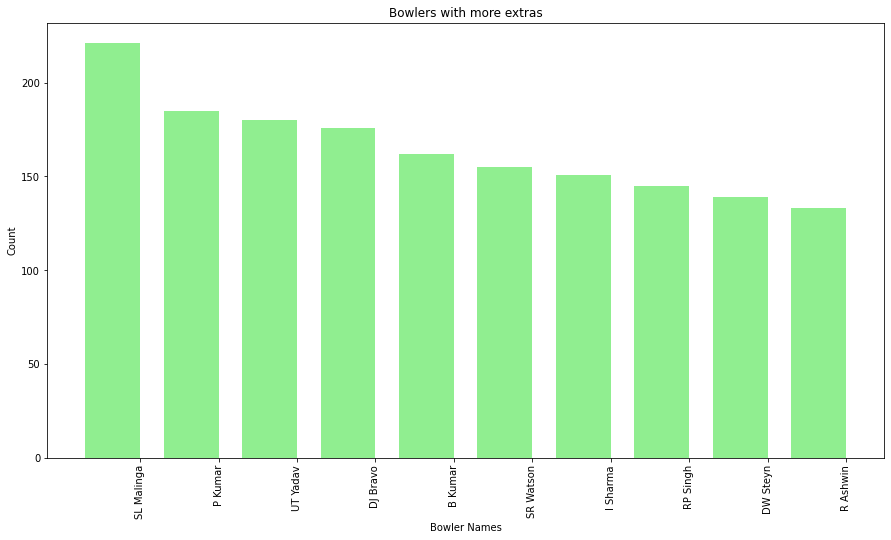

In [ ]:
temp_df = d_data.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='lightgreen')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras")
ax.set_xlabel('Bowler Names')
plt.show()

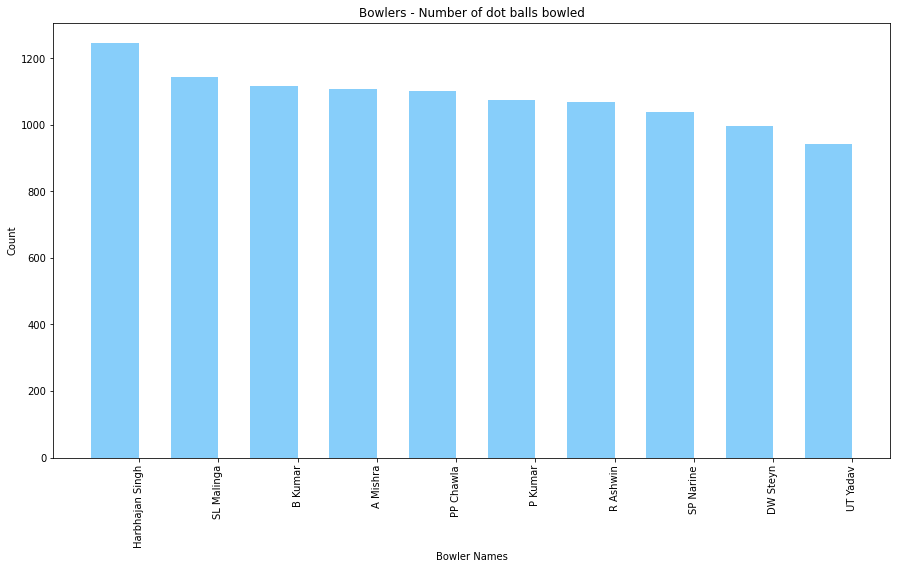

In [ ]:
temp_df = d_data.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.6
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers - Number of dot balls bowled")
ax.set_xlabel('Bowler Names')
plt.show()

During analysing data I observe that to win a match the bowlers, batsman and fielders all play a crucial role.

The bowlers with there balls try to reduce the runrate.

The batsman try to gain more runs for their team.

The fielders try to reduce the runrate. 

After analysing the data i come to conclusion that,
* choosing to bowling first increase the chances to wining.
* Virat kohli, S.K.Raina are top run scorer and CH Gayle is the batsman who hit max 6 in IPL.
* Harbhajan Singh, SL Malinga, B Kumar are the ballers who bowled most dot balls.
* Team like Mumbai indians, Chennai Super kings won IPL most times. 

So, the above players and team should be the one a company should endorse for its products.

The most succesful team - Mumbai Indians

The most succesful player - Virat kohli


#Thank you